
Shape of the DataFrame:
(398, 8)

Columns of the DataFrame:
['mpg' 'cylinders' 'displacement' 'horsepower' 'weight' 'acceleration'
 'model_year' 'origin']

'name' column set as DataFrame index.

DataFrame after setting 'name' as index (first 5 rows):
                            mpg  cylinders  displacement  horsepower  weight  \
name                                                                           
chevrolet chevelle malibu  18.0          8         307.0       130.0    3504   
buick skylark 320          15.0          8         350.0       165.0    3693   
plymouth satellite         18.0          8         318.0       150.0    3436   
amc rebel sst              16.0          8         304.0       150.0    3433   
ford torino                17.0          8         302.0       140.0    3449   

                           acceleration  model_year origin  
name                                                        
chevrolet chevelle malibu          12.0          70    usa  
buic

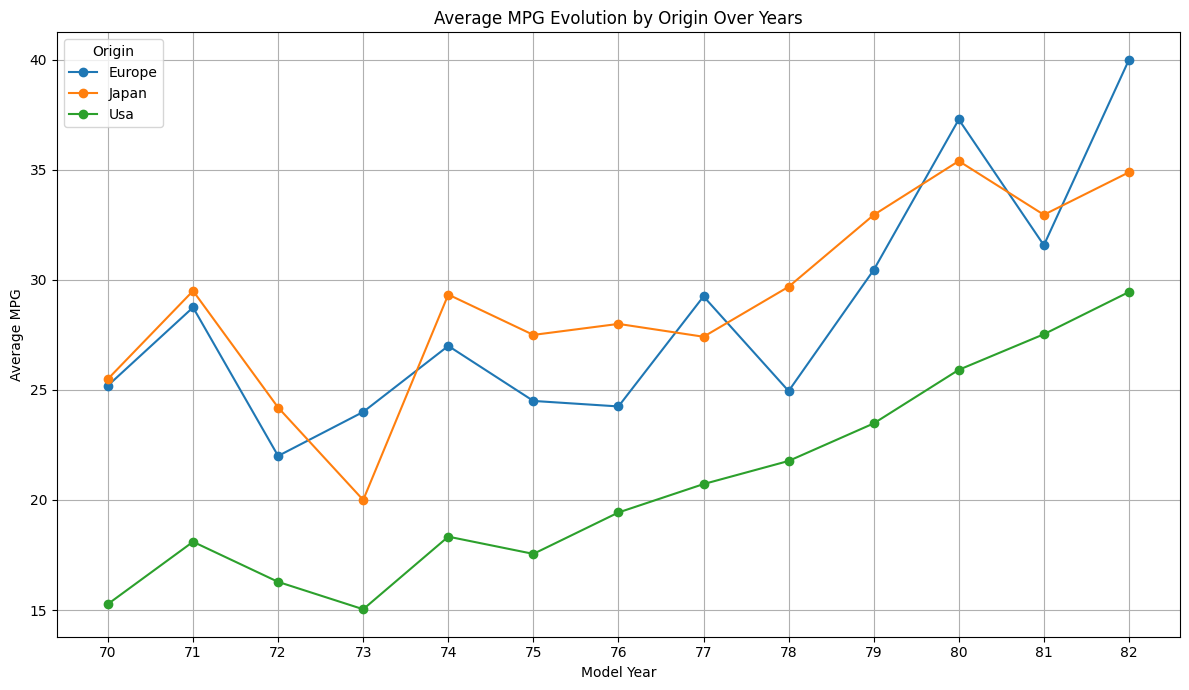


--- Identifying Consistent Car Models ---

Consistent Car Models (produced over multiple years with low MPG variation):
                          name  num_appearances    avg_mpg   std_mpg
141           ford galaxie 500                3  14.333333  0.577350
223          plymouth fury iii                3  14.333333  0.577350
267        toyota corolla 1200                2  31.500000  0.707107
175                  mazda 626                2  31.450000  0.212132
287          volkswagen rabbit                2  29.250000  0.353553
95                datsun pl510                2  27.000000  0.000000
260                  saab 99le                2  24.500000  0.707107
276             toyota mark ii                2  19.500000  0.707107
98                 dodge aspen                2  18.850000  0.353553
49   chevrolet chevelle malibu                2  17.500000  0.707107
11            amc matador (sw)                2  14.500000  0.707107
143      ford gran torino (sw)                2  13

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

cars_df = pd.read_csv('Cars.csv')

cars_df.set_index('name', inplace=True)

# Confirm the change
print("\nShape of the DataFrame:")
print(cars_df.shape)

print("\nColumns of the DataFrame:")
column_names = cars_df.columns.values
print(column_names)

print("\n'name' column set as DataFrame index.")
print("\nDataFrame after setting 'name' as index (first 5 rows):")
print(cars_df.head())

print("\nUnique MPG values:")
print(cars_df['mpg'].unique())

cars_df['hp_per_weight'] = cars_df['horsepower'] / cars_df['weight']
# cars_df.set_index('hp_per_weight', inplace=True)
print("\nNew column 'hp_per_weight' created and set as DataFrame index.")
print("\nDataFrame after creating 'hp_per_weight' and setting it as index (first 5 rows):")
print(cars_df.head())

cars_df_reset = cars_df.reset_index()
car_with_max_hp = cars_df_reset.loc[cars_df_reset['horsepower'].idxmax()]
print(f"Horsepower: {car_with_max_hp['horsepower']}")

cars_df_reset['mpg'] = pd.to_numeric(cars_df_reset['mpg'], errors='coerce')
cars_with_high_mpg = cars_df_reset[cars_df_reset['mpg'] >= 35]
num_cars_high_mpg = len(cars_with_high_mpg)
print(f"\nNumber of cars with MPG >= 35: {num_cars_high_mpg}")

filtered_cars = cars_df_reset[(cars_df_reset['horsepower'] > 100) & (cars_df_reset['weight'] < 3000)]

most_common_origin = filtered_cars['origin'].mode()[0]

print(f"\nMost common origin for cars with horsepower > 100 and weight < 3000: {most_common_origin}")

japan_cars = cars_df_reset[cars_df_reset['origin'] == 'japan']
mean_acceleration_japan = round(japan_cars['acceleration'].mean(), 2)
print(f"\nMean acceleration of cars from Japan: {mean_acceleration_japan}")

average_mpg_by_year = cars_df_reset.groupby('model_year')['mpg'].mean()
year_highest_avg_mpg = average_mpg_by_year.idxmax()
print(f"\nYear with the highest average MPG: {year_highest_avg_mpg}")

median_mpg_overall = cars_df_reset['mpg'].median()
above_median_mpg_cars = cars_df_reset[cars_df_reset['mpg'] > median_mpg_overall].copy() # .copy() to avoid SettingWithCopyWarning

# Calculate horsepower to weight ratio for these filtered cars
above_median_mpg_cars['hp_to_weight_ratio'] = above_median_mpg_cars['horsepower'] / above_median_mpg_cars['weight']

# Find the maximum ratio
max_hp_to_weight_ratio = above_median_mpg_cars['hp_to_weight_ratio'].max()

cars_with_best_ratio = above_median_mpg_cars[above_median_mpg_cars['hp_to_weight_ratio'] == max_hp_to_weight_ratio]
if 'name' not in cars_with_best_ratio.columns:
    cars_with_best_ratio.reset_index(inplace=True)

print(f"\nCars with the best horsepower to weight ratio among those with above-median MPG:")
print(cars_with_best_ratio[['name', 'mpg', 'horsepower', 'weight', 'hp_to_weight_ratio']])

import matplotlib.pyplot as plt
avg_mpg_by_year_origin = cars_df_reset.groupby(['model_year', 'origin'])['mpg'].mean().unstack()

plt.figure(figsize=(12, 7)) # Set a larger figure size for better readability

for column in avg_mpg_by_year_origin.columns:
    plt.plot(avg_mpg_by_year_origin.index, avg_mpg_by_year_origin[column], marker='o', label=column.replace('_', ' ').title())

plt.title('Average MPG Evolution by Origin Over Years')
plt.xlabel('Model Year')
plt.ylabel('Average MPG')
plt.legend(title='Origin')
plt.grid(True)
plt.xticks(avg_mpg_by_year_origin.index) # Ensure all model years are shown on x-axis
plt.tight_layout()
plt.show()

print("\n--- Identifying Consistent Car Models ---")

car_model_stats = cars_df_reset.groupby('name').agg(
    num_appearances=('model_year', 'nunique'),
    std_mpg=('mpg', 'std'),
    avg_mpg=('mpg', 'mean')
).reset_index()

# Filter for cars that appear in more than one model_year (num_appearances > 1)
# And have a standard deviation of mpg < 1.0
consistent_cars = car_model_stats[
    (car_model_stats['num_appearances'] > 1) &
    (car_model_stats['std_mpg'] < 1.0)
].copy() # Use .copy() to avoid SettingWithCopyWarning

consistent_cars.dropna(subset=['std_mpg'], inplace=True)

consistent_cars_sorted = consistent_cars.sort_values(
    by=['num_appearances', 'avg_mpg'],
    ascending=[False, False]
)

print("\nConsistent Car Models (produced over multiple years with low MPG variation):")
# Select and print the required columns
print(consistent_cars_sorted[['name', 'num_appearances', 'avg_mpg', 'std_mpg']])

# Week 1 - Summer Analytics 2025
### Objective:
- Load and explore dataset
- Clean data
- Create visualizations
